In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
test_images.shape

(10000, 28, 28)

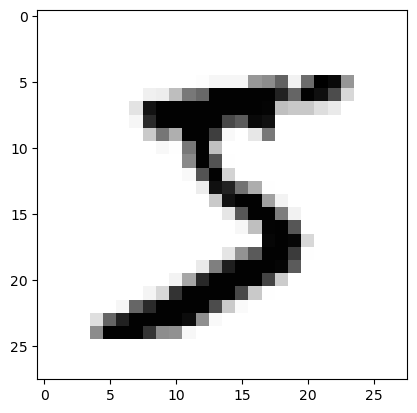

In [18]:
plt.imshow(train_images[0], cmap="Greys")

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [20]:
model.compile(optimizer='Adadelta',
                loss='mse',
                metrics=['accuracy'])

In [21]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [22]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2348 - accuracy: 0.1568
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1981 - accuracy: 0.1676
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1685 - accuracy: 0.1776
Epoch 4/5
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1466 - accuracy: 0.1881
Epoch 5/5
60000/60000 [==============================] - 12s 201us/sample - loss: 0.1310 - accuracy: 0.2014


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

테스트 정확도: 0.2154


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.1199 - accuracy: 0.2203
Epoch 2/5
60000/60000 [==============================] - 12s 201us/sample - loss: 0.1121 - accuracy: 0.2433
Epoch 3/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.1065 - accuracy: 0.2670
Epoch 4/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.1023 - accuracy: 0.2907
Epoch 5/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0992 - accuracy: 0.3128


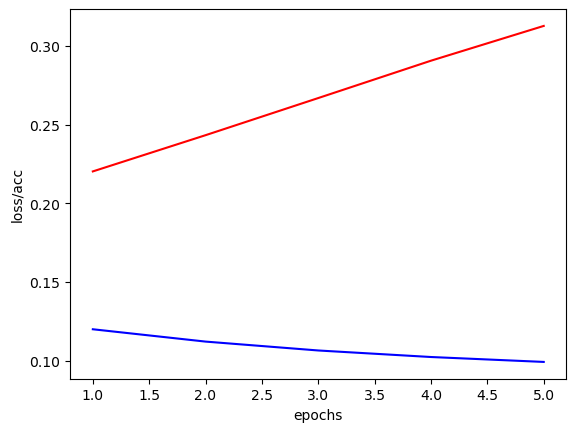

In [25]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()